In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('hasil_scraping.csv')

df.head()

,Title,Price,Rating,Colors,Size,Gender,Timestamp
0,T-shirt 2,102.15,3.9,3,M,Women,2025-05-16T17:03:32.655281
1,Hoodie 3,496.88,4.8,3,L,Unisex,2025-05-16T17:03:32.655447
2,Pants 4,467.31,3.3,3,XL,Men,2025-05-16T17:03:32.655594
3,Outerwear 5,321.59,3.5,3,XXL,Women,2025-05-16T17:03:32.655735
4,Jacket 6,153.37,3.3,3,S,Unisex,2025-05-16T17:03:32.655877


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      901 non-null    object 
 1   Price      901 non-null    float64
 2   Rating     901 non-null    float64
 3   Colors     901 non-null    int64  
 4   Size       901 non-null    object 
 5   Gender     901 non-null    object 
 6   Timestamp  901 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 49.4+ KB


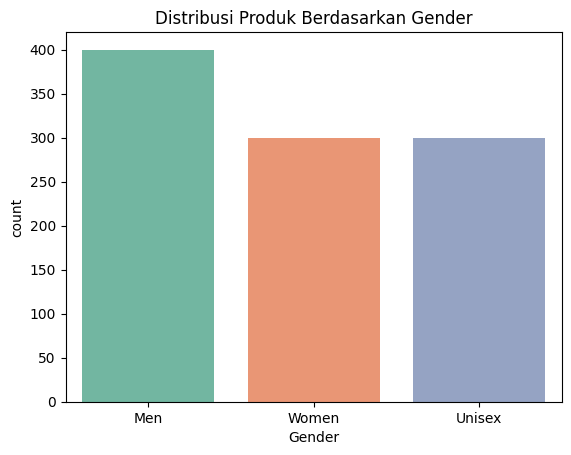

In [16]:
# Distribusi Gender
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribusi Produk Berdasarkan Gender')
plt.show()

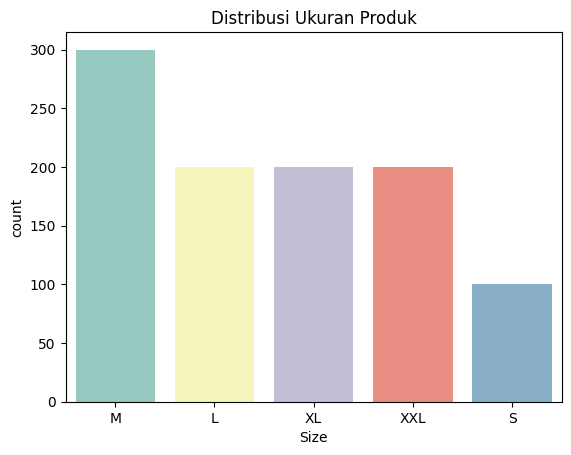

In [17]:
# Distribusi Ukuran
sns.countplot(data=df, x='Size', palette='Set3', order=df['Size'].value_counts().index)
plt.title('Distribusi Ukuran Produk')
plt.show()

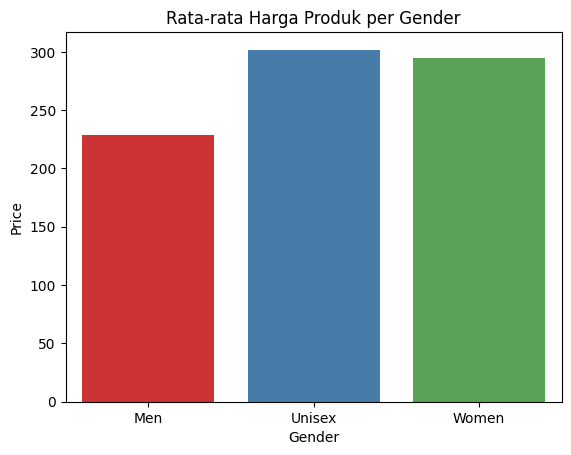

In [20]:
# Rata-rata Harga per Gender
avg_price_gender = df.groupby("Gender")['Price'].mean().reset_index()
sns.barplot(data=avg_price_gender, x='Gender', y='Price', palette='Set1')
plt.title('Rata-rata Harga Produk per Gender')
plt.show()

In [22]:
# Produk Unik
print("Jumlah Produk Unik:", df['Title'].nunique())
print("Produk dengan Rating Tertinggi:")
print(df.sort_values(by='Rating', ascending=False).head())

Jumlah Produk Unik: 901
Produk dengan Rating Tertinggi:
           Title   Price  Rating  Colors Size  Gender  \
146   Hoodie 147  190.80     5.0       3    M  Unisex   
854   Hoodie 855  203.11     5.0       3  XXL  Unisex   
785   Jacket 786  421.83     5.0       3    S  Unisex   
349  T-shirt 350  502.98     5.0       3  XXL   Women   
361  T-shirt 362  298.55     5.0       3    M   Women   

                      Timestamp  
146  2025-05-14T14:16:11.280792  
854  2025-05-14T14:16:56.038470  
785  2025-05-14T14:16:52.311439  
349  2025-05-14T14:16:24.544167  
361  2025-05-14T14:16:25.806638  


In [11]:
import pandas as pd

# === Cek Data Kotor ===
print("=== Check Data Kotor ===")
dirty_data = df[
    (df['Title'] == 'Unknown Product') |
    (df['Rating'] == 0.0) |
    (df['Price'] == 0.0) |
    (df['Size'].isin(['', 'NA'])) |
    (df['Gender'].isin(['', 'Unknown'])) |
    (df['Colors'] == 0)
]
print(dirty_data.head(100))
print(f"[{len(dirty_data)} rows x {dirty_data.shape[1]} columns]")

# === Cek Duplikat ===
print("\n=== Check Duplikat ===")
duplicates = df[df.duplicated(subset=["Title", "Price", "Rating", "Colors", "Size", "Gender"], keep=False)]
print(duplicates.head(100))
print(f"[{len(duplicates)} rows x {duplicates.shape[1]} columns]")


=== Check Data Kotor ===
Empty DataFrame
Columns: [Title, Price, Rating, Colors, Size, Gender, Timestamp]
Index: []
[0 rows x 7 columns]

=== Check Duplikat ===
Empty DataFrame
Columns: [Title, Price, Rating, Colors, Size, Gender, Timestamp]
Index: []
[0 rows x 7 columns]
